## Preprocessing

use tsne to plot dimensions at the end of the analysis and tehn do a kmean analysis 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


inlcude a paragraph about my findings. 

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/drive/MyDrive/Colab/Deep Learning Homework /Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# google drive had to be "mounted", the csv wa sthen uploaded to "content", "drive", and so on.  

In [4]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# Drop non-beneficial columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE


application_df = application_df.drop(["EIN", "NAME"], axis=1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [6]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
for col in application_df.columns:
  if col not in ["STATUS", "ASK_AMT"]:
    print(col)
    print(len(application_df[col].value_counts()))
   

APPLICATION_TYPE
17
AFFILIATION
6
CLASSIFICATION
71
USE_CASE
5
ORGANIZATION
4
INCOME_AMT
9
SPECIAL_CONSIDERATIONS
2
IS_SUCCESSFUL
2


In [8]:
# bottom five only total 11 applications.  these are not value add. 
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<function matplotlib.pyplot.show>

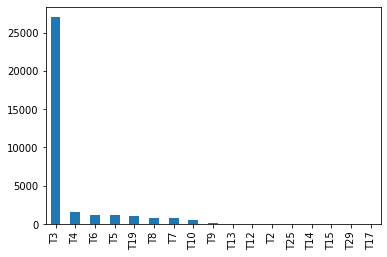

In [9]:
# a good indication that the data needs to be scaled
application_df.APPLICATION_TYPE.value_counts().plot(kind="bar")
plt.show

In [10]:
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C3700        1
C4200        1
C1236        1
C2380        1
C1580        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [11]:
application_df.APPLICATION_TYPE.value_counts() < 500

T3     False
T4     False
T6     False
T5     False
T19    False
T8     False
T7     False
T10    False
T9      True
T13     True
T12     True
T2      True
T25     True
T14     True
T15     True
T29     True
T17     True
Name: APPLICATION_TYPE, dtype: bool

In [12]:

# list of app types that i want, as they have 500 or more items 
app_values = application_df.APPLICATION_TYPE.value_counts()
list(app_values[app_values <500].index)

['T9', 'T13', 'T12', 'T2', 'T25', 'T14', 'T15', 'T29', 'T17']

In [13]:
# Choose a cutoff value and create a list of application types to be replaced  (cutoff should inlcude those types with less than 500)
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE

cutoff = 500
app_values = application_df.APPLICATION_TYPE.value_counts()
application_types_to_replace = list(app_values[app_values < cutoff].index)


# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# the field above shows the 9 application types that have been grouped together under "other" as it shows 276. 

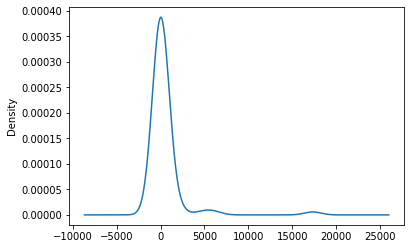

In [15]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts().plot.kde()


In [16]:
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C3700        1
C4200        1
C1236        1
C2380        1
C1580        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [17]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts() >1


C1000     True
C2000     True
C1200     True
C3000     True
C2100     True
         ...  
C3700    False
C4200    False
C1236    False
C2380    False
C1580    False
Name: CLASSIFICATION, Length: 71, dtype: bool

In [18]:

class_values = application_df.CLASSIFICATION.value_counts()
class_values[class_values >1].head()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [19]:
# Choose a cutoff value and create a list of classifications to be replaced, these scores can be changed to adjust for accuracy.  
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
class_values = application_df.CLASSIFICATION.value_counts()

cutoff = 500
classifications_to_replace = list(class_values[class_values < cutoff].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [20]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
application_df = pd.get_dummies(application_df)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


In [21]:
application_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [22]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
X = application_df.drop("IS_SUCCESSFUL", axis=1)
y = application_df.IS_SUCCESSFUL

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       ...,
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365],
       [ 0.01394306, -0.03145581, -0.09072362, ..., -0.07126932,
         0.02858365, -0.02858365]])

In [25]:
X.head()


,STATUS,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C3000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,108590,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,1,6692,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,1,142590,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


## Compile, Train and Evaluate the Model

In [26]:
nn_model = tf.keras.models.Sequential()

In [27]:

import sklearn as skl

In [28]:
# to determine the numbers of input dimensions. 
len(X.columns)

44

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE



# First hidden layer
#  YOUR CODE GOES HERE

nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=len(X.columns)))


# Second hidden layer
#  YOUR CODE GOES HERE
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=16, activation="tanh"))

# Output layer
#  YOUR CODE GOES HERE
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                720       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the model
#  YOUR CODE GOES HERE
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 3s 2ms/step - loss: 0.5772 - accuracy: 0.7112
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5560 - accuracy: 0.7274
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7294
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5512 - accuracy: 0.7291
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7301
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5487 - accuracy: 0.7313
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7318
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5475 - accuracy: 0.7309
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7329
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5466 - accuracy: 0.7320

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5535 - accuracy: 0.7283 - 476ms/epoch - 2ms/step
Loss: 0.5535070300102234, Accuracy: 0.7282798886299133


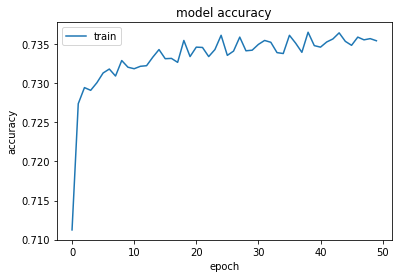

In [33]:
plt.plot(fit_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

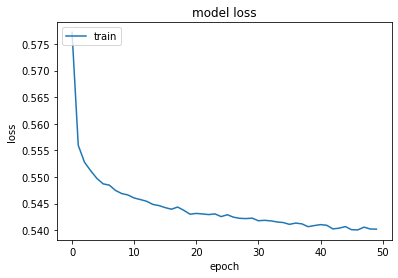

In [34]:
plt.plot(fit_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn_model.save("/content/drive/MyDrive/Colab/Deep Learning Homework/model_2.h5")